In [2]:
%load load_and_enrich.py

CPU times: user 3.74 s, sys: 251 ms, total: 3.99 s
Wall time: 5.1 s
CPU times: user 3.55 s, sys: 216 ms, total: 3.77 s
Wall time: 3.78 s
CPU times: user 4.64 s, sys: 912 ms, total: 5.55 s
Wall time: 6.82 s
CPU times: user 535 ms, sys: 142 ms, total: 676 ms
Wall time: 685 ms
CPU times: user 539 ms, sys: 139 ms, total: 678 ms
Wall time: 717 ms


In [3]:
#let's get rid of the outliers
train = train[train.Y < 40]

In [4]:
from IPython.display import display,clear_output
import ipywidgets as widgets
import seaborn as sns
from matplotlib import cm
import matplotlib as mpl
mpl.rcParams['figure.figsize']=[20,10]

In [5]:
def pivot_train_count_data(index,column):
    return train.pivot_table(
        index=index,
        columns=[column],
        values='X',
        aggfunc=np.count_nonzero
    )
ordered_categories = list(train.Category.value_counts().index)

In [10]:
def on_update(e=None):
    index = vertical_buttons.value
    column = horizontal_buttons.value
    if index == column:
        return
    df = pivot_train_count_data(index=index, column=column)
    
    if index == 'Category':
        df = df.loc[ordered_categories]
    elif column == 'Category':
        df = df[ordered_categories]
    
    clear_output(wait=True)
    html_df.value = ''
    
    if output_kind.value == 'table':
        html_df.value = df.to_html()
    else:
        ax = plt.gca()
#         fig = plt.figure(figsize=(20,10))
        ax = sns.heatmap(df, linewidths=.5,cmap=cm.RdYlBu_r)
        plt.show()
    

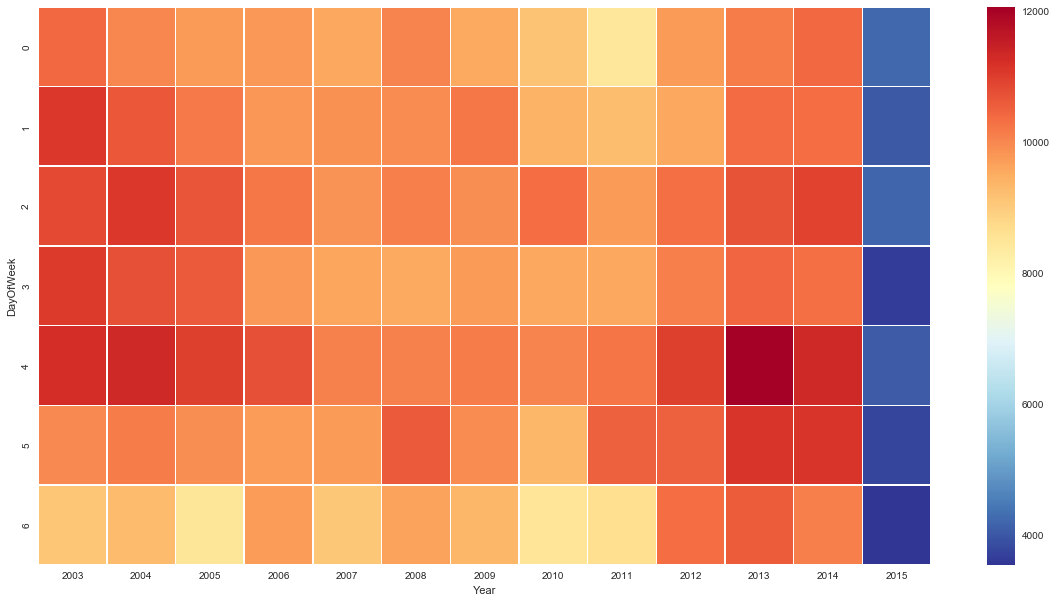

In [11]:
columns = ['Category','Year','Month','Day','DayOfWeek']

horizontal_buttons = widgets.ToggleButtons(description='Horizontal', options=columns, value='Year')
vertical_buttons = widgets.ToggleButtons(description='Vertical', options=columns, value='Month')
output_kind = widgets.RadioButtons(description='Ouput :', options=['table','heatmap'])
df = pivot_train_count_data(index=vertical_buttons.value, column=horizontal_buttons.value)
html_df = widgets.HTML()
plt.ioff()
# plt.figure(figsize=(20,10))

main = widgets.Box([
    widgets.HBox([horizontal_buttons,]),
    widgets.HBox([vertical_buttons,]),
    output_kind,
    html_df
])

display(main)

on_update()
horizontal_buttons.observe(handler=on_update)
vertical_buttons.observe(handler=on_update)
output_kind.observe(handler=on_update)

In [12]:
%load_ext version_information
%version_information numpy,pandas,matplotlib,seaborn

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.2.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.10.4
pandas 0.18.1
matplotlib 1.5.1
seaborn 0.7.0
Tue May 31 02:30:01 2016 BST